In [180]:
# Incompressible Flow Solver
# STREAMFUNCTION-VORTICITY FORMULATION
# Written by Mr A. J. Brierley
# 03/06/2025
#
# Based on "8. Numerical Navier-Stokers: Vorticity-Streamfunction Formulation - Part 2"
# By Professor Saad Explains
# https://www.youtube.com/watch?v=6VWnIchygg4&list=PLEaLl6Sf-KIC7oet7zvNfW03aocrIq-s4&index=9

In [181]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
plt.rcParams['animation.html'] = 'html5'

In [182]:
nx = 13
ny = 13
lx = 1.0
ly = 1.0
dx = lx/(nx-1)
dy = ly/(ny-1)

In [183]:
Ut = 1.0 # top wall velocity

In [184]:
psi0 = np.zeros([nx,ny])
w0 = np.zeros([nx,ny])

# STREAMFUNCTION BOUNDARY CONDITIONS
psi_wall = 0.0

# VORTICITY BOUNDARY CONDITIONS 
# Notation: w0[j,i]
w0[:,0] = 2.0*(psi_wall - psi0[:,1])/dx/dx                # left wall
w0[:,-1] = 2.0*(psi_wall - psi0[:,-2])/dx/dx              # right wall
w0[0,:] = 2.0*(psi_wall - psi0[1,:])/dy/dy                # bottom wall
w0[-1,:] = 2.0*(psi_wall - psi0[-2,:])/dy/dy - 2.0*Ut/dy  # top wall 

# Solution storage
psisol = []
psisol.append(psi0)
wsol = []
wsol.append(w0)

In [185]:
# print(w0)

In [186]:
# simulation parameters
beta = 1.5
tol = 1e-3
maxIt = 30

t = 0.0  # initial time and time counter
v = 0.05  # nu
dt = min(0.25*dx*dx/v, 4*v/Ut/Ut)
tend = 1000*dt
print('dt =', dt, 's')
print('Re =', Ut*lx/v)


dt = 0.03472222222222222 s
Re = 20.0


In [187]:
while t < tend:
    # STREAMFUNCTION-POISSON EQUATION
    it = 0
    err = 1e5
    wn = wsol[-1]
    psi = psisol[-1].copy()
    while err > tol and it < maxIt:
        psik = np.zeros_like(psi)
        psik[1:-1, 1:-1] = psi[1:-1, 1:-1]
        for i in range(1,nx-1):
            for j in  range(1,ny-1):
                rhs = (dx*dy)**2*wn[j,i] + dy**2*(psi[j,i+1]+ psi[j,i-1]) + dx**2*(psi[j+1,i] + psi[j-1,i])
                rhs *= beta/2.0/(dx**2 + dy**2)
                psi[j,i] = rhs + (1 - beta)*psi[j,i]
        err = np.linalg.norm(psi.ravel() - psik.ravel())
        it += 1
        # print(it)
    psisol.append(psi)

    w = np.zeros_like(wn)
    # 2D VORTICITY TRANSPORT EQUATION
    Cx = -(psi[2:,1:-1] - psi[:-2,1:-1])/2.0/dy * (wn[1:-1,2:] - wn[1:-1,:-2])/2.0/dx
    Cy = (psi[1:-1,2:] - psi[1:-1,:-2])/2.0/dx * (wn[2:,1:-1] - wn[:-2,1:-1])/2.0/dy
    Dx = (wn[1:-1,2:] + wn[1:-1,:-2] - 2.0*wn[1:-1,1:-1])/dx/dx
    Dy = (wn[2:,1:-1] + wn[:-2,1:-1] - 2.0*wn[1:-1,1:-1])/dy/dy

    rhs = Cx + Cy + v*(Dx + Dy)  
    w[1:-1,1:-1] = wn[1:-1,1:-1] + dt * rhs

    # UPDATE VORTICITY BOUNDARY CONDITIONS 
    w[:,0] = 2.0*(psi_wall - psi[:,1])/dx/dx                # left wall
    w[:,-1] = 2.0*(psi_wall - psi[:,-2])/dx/dx              # right wall
    w[0,:] = 2.0*(psi_wall - psi[1,:])/dy/dy                # bottom wall
    w[-1,:] = 2.0*(psi_wall - psi[-2,:])/dy/dy - 2.0*Ut/dy  # top wall 

    wsol.append(w)
    
    t += dt
        


(np.float64(0.0), np.float64(12.0), np.float64(0.0), np.float64(12.0))

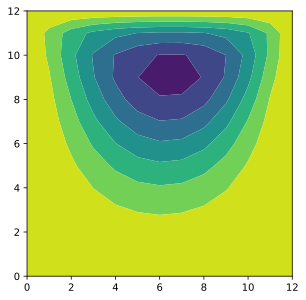

In [188]:
plt.contourf(psisol[-1])
plt.axis('square')

(np.float64(0.0), np.float64(12.0), np.float64(0.0), np.float64(12.0))

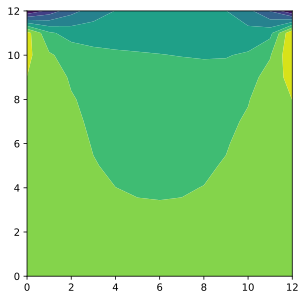

In [189]:
plt.contourf(wsol[-1])
plt.axis('square')

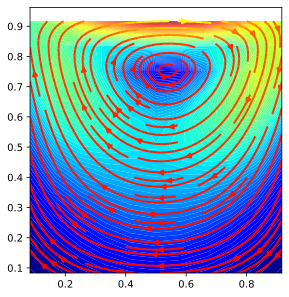

In [190]:
x = np.linspace(0,1,nx)
y = np.linspace(0,1,ny)
xx,yy = np.meshgrid(x,y)
nn = 1
psi = psisol[-1]
u = (psi[2:,1:-1] - psi[:-2,1:-1])/2.0/dy
v = -(psi[1:-1, 2:] - psi[1:-1,:-2])/2.0/dx

# print(u)
# print(v)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(xx[1:-1,1:-1], yy[1:-1,1:-1], np.sqrt(u*u + v*v), levels = 100, cmap=plt.cm.jet)
ax.streamplot(xx[1:-1,1:-1],yy[1:-1,1:-1],u, v, color=abs(u*u + v*v),cmap=plt.cm.autumn, linewidth=2)
ax.set_xlim([xx[0,1],xx[0,-2]])
ax.set_aspect(1)
